<a href="https://colab.research.google.com/github/zrsteff/CSC587/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATA/diabetes_train.csv'
df_diabetes = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
print(df_diabetes.head())

First 5 rows of the DataFrame:
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


In [22]:
#create test dataframe
df_diabetes_test = df_diabetes.tail(10)
print(df_diabetes_test.head())
print(f"Shape of df_diabetes_test: {df_diabetes_test.shape}")

     preg  plas  pres  skin  insu  mass   pedi  age            class
748     3   187    70    22   200  36.4  0.408   36  tested_positive
749     6   162    62     0     0  24.3  0.178   50  tested_positive
750     4   136    70     0     0  31.2  1.182   22  tested_positive
751     1   121    78    39    74  39.0  0.261   28  tested_negative
752     3   108    62    24     0  26.0  0.223   25  tested_negative
Shape of df_diabetes_test: (10, 9)


In [23]:
df_diabetes_train = df_diabetes.iloc[:-10]
print("Shape of df_diabetes_train after removing test rows:")
print(df_diabetes_train.shape)
print(df_diabetes_train.head())

Shape of df_diabetes_train after removing test rows:
(748, 9)
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


In [24]:
X_train = df_diabetes_train.drop('class', axis=1)
y_train = df_diabetes_train['class']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

print("Shape of X_train:", X_train.shape)
print(X_train.head())
print("Shape of y_train:", y_train.shape)
print(y_train[:5])


Shape of X_train: (748, 8)
   preg  plas  pres  skin  insu  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33
Shape of y_train: (748,)
[1 0 1 0 1]


In [25]:
X_test = df_diabetes_test.drop('class', axis=1)
y_test = df_diabetes_test['class']

y_test = label_encoder.transform(y_test)

print("Shape of X_test:", X_test.shape)
print(X_test.head())
print("Shape of y_test:", y_test.shape)
print(y_test[:5])

Shape of X_test: (10, 8)
     preg  plas  pres  skin  insu  mass   pedi  age
748     3   187    70    22   200  36.4  0.408   36
749     6   162    62     0     0  24.3  0.178   50
750     4   136    70     0     0  31.2  1.182   22
751     1   121    78    39    74  39.0  0.261   28
752     3   108    62    24     0  26.0  0.223   25
Shape of y_test: (10,)
[1 1 1 0 0]


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(random_state=42, probability=True)

svm_model.fit(X_train_scaled, y_train)

#analysis for accuracy against the test
y_pred_test_in_training_cell = svm_model.predict(X_test_scaled)
print("Predictions for Test Set",y_pred_test_in_training_cell)
accuracy_test_in_training_cell = accuracy_score(y_test, y_pred_test_in_training_cell)
print(f"Accuracy on test set (calculated in training cell): {accuracy_test_in_training_cell:.4f}")

Predictions for Test Set [1 0 1 0 0 0 1 1 0 0]
Accuracy on test set (calculated in training cell): 0.7000


Model Evaluation

Model Accuracy: 0.7000

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.57      0.73         7

    accuracy                           0.70        10
   macro avg       0.75      0.79      0.70        10
weighted avg       0.85      0.70      0.71        10


Confusion Matrix


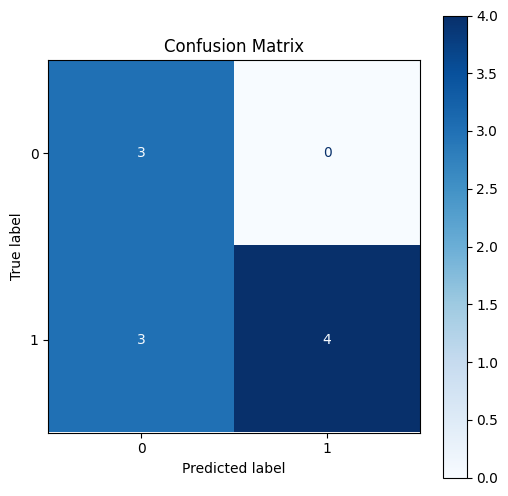


ROC Curve and AUC


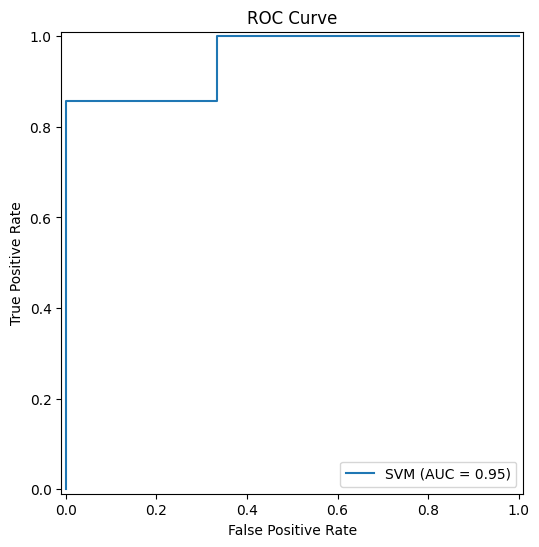

ROC AUC: 0.9524

Precision-Recall Curve


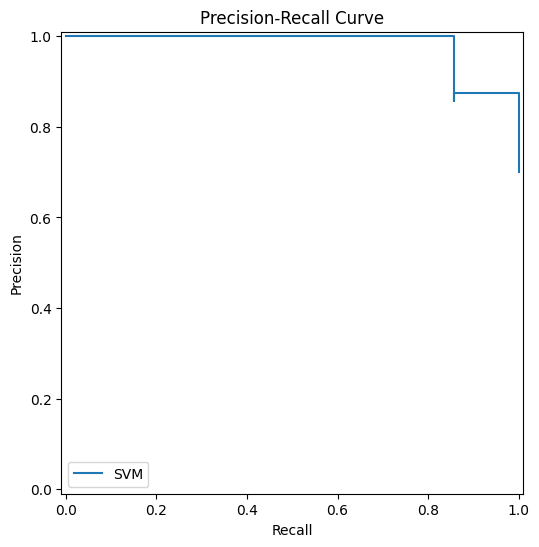

In [27]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, log_loss
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class

print("Model Evaluation")

# 1. Accuracy and Classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# 2. Confusion Matrix
print("\nConfusion Matrix")
fig_cm, ax_cm = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test, cmap=plt.cm.Blues, ax=ax_cm)
ax_cm.set_title('Confusion Matrix')
plt.show()

# 3. ROC Curve and AUC
print("\nROC Curve and AUC")
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM').plot(ax=ax_roc)
ax_roc.set_title('ROC Curve')
plt.show()
print(f"ROC AUC: {roc_auc:.4f}")

# 4. Precision-Recall Curve
print("\nPrecision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_test, y_proba)
fig_pr, ax_pr = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='SVM').plot(ax=ax_pr)
ax_pr.set_title('Precision-Recall Curve')
plt.show()